In [ ]:
# KMEANS IS BAD FOR CATEGORICAL DATA SO DON'T CONSIDER IT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances

# Load dataset
df = pd.read_csv("./users.csv")  # Update with actual file path

# Sample 2,000 users
df_sample = df.sample(n=2000, random_state=42).reset_index(drop=True)

# One-Hot Encode categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df_sample[["Country", "AgeGroup"]])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())

# Add UserID for reference
encoded_df["UserID"] = df_sample["UserID"]


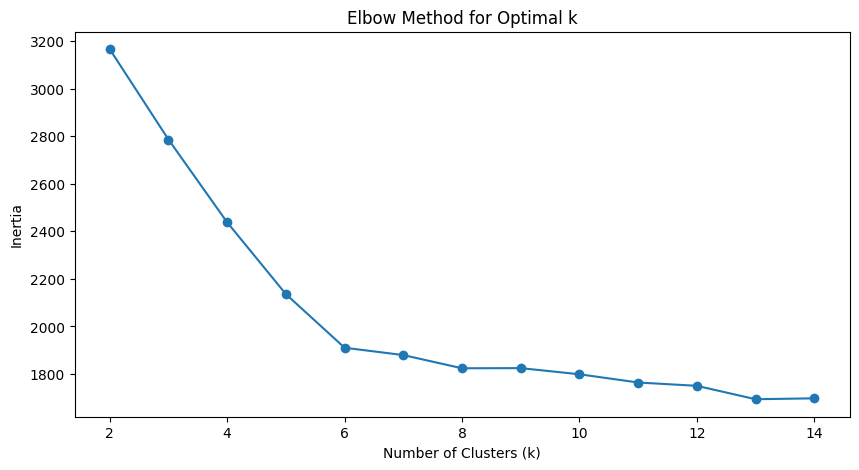

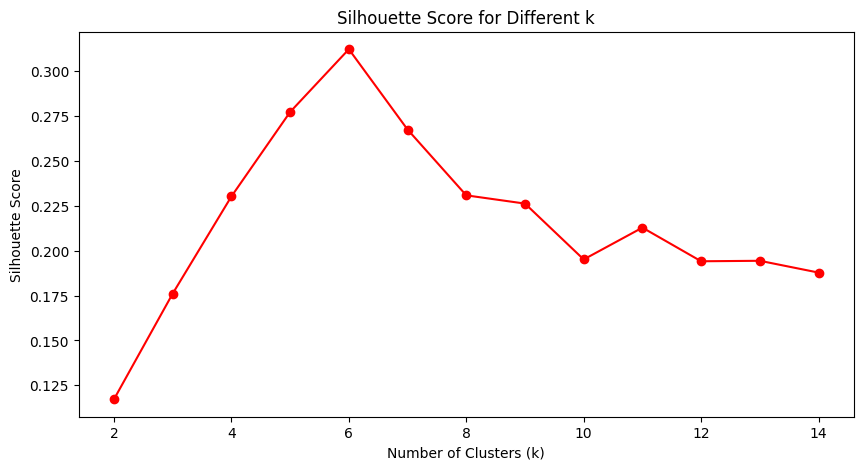

In [10]:
from sklearn.metrics import silhouette_score

# Find the best k using the Elbow Method
inertia = []
silhouette_scores = []
k_values = range(2, 15)  # Testing k from 2 to 14

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(encoded_features.toarray())  # Convert sparse to dense

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(encoded_features, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', color="red")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k")
plt.show()


In [11]:
# Train KMeans with chosen k
optimal_k = 6  # Adjust based on the elbow method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_sample["Cluster"] = kmeans.fit_predict(encoded_features)

# Show cluster assignment
print(df_sample[["UserID", "Country", "AgeGroup", "Cluster"]].head(10))


   UserID      Country AgeGroup  Cluster
0   75722  Switzerland    55-64        2
1   80185        China    35-44        1
2   19865      Romania    65-74        5
3   76700       Mexico    55-64        2
4   92992      Germany    45-54        4
5   76435       France    35-44        1
6   84005        Japan    55-64        2
7   80918        Italy    55-64        2
8   60768        Nepal    45-54        4
9   50075     Pakistan    35-44        1


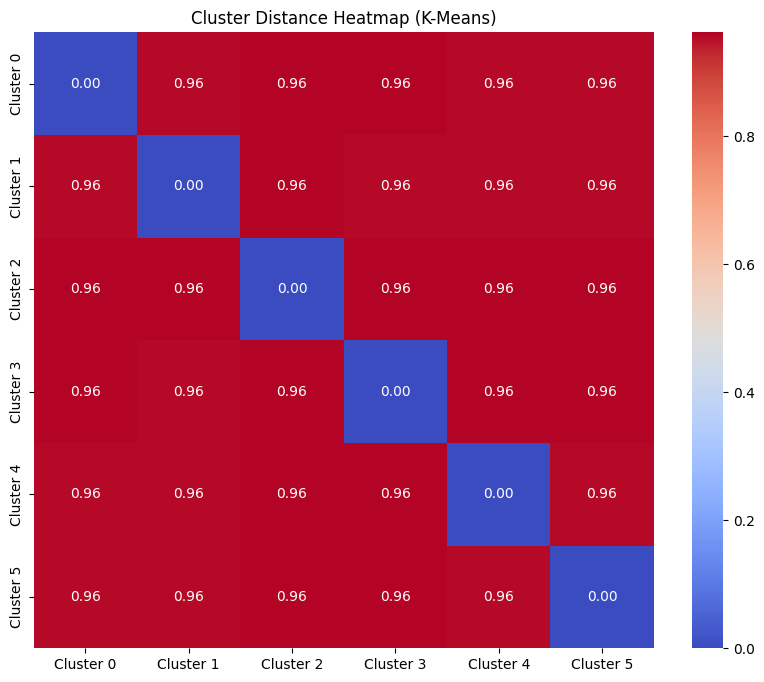

In [17]:
# Compute Pairwise Distance Matrix for K-Means centroids (using Cosine Distance)
distance_matrix = pairwise_distances(kmeans.cluster_centers_, metric="cosine")

# Convert to DataFrame for better visualization
distance_df = pd.DataFrame(distance_matrix, index=[f"Cluster {i}" for i in range(optimal_k)],
                           columns=[f"Cluster {i}" for i in range(optimal_k)])

# Plot Heatmap of Cluster Distances
plt.figure(figsize=(10, 8))
sns.heatmap(distance_df, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Cluster Distance Heatmap (K-Means)")
plt.show()

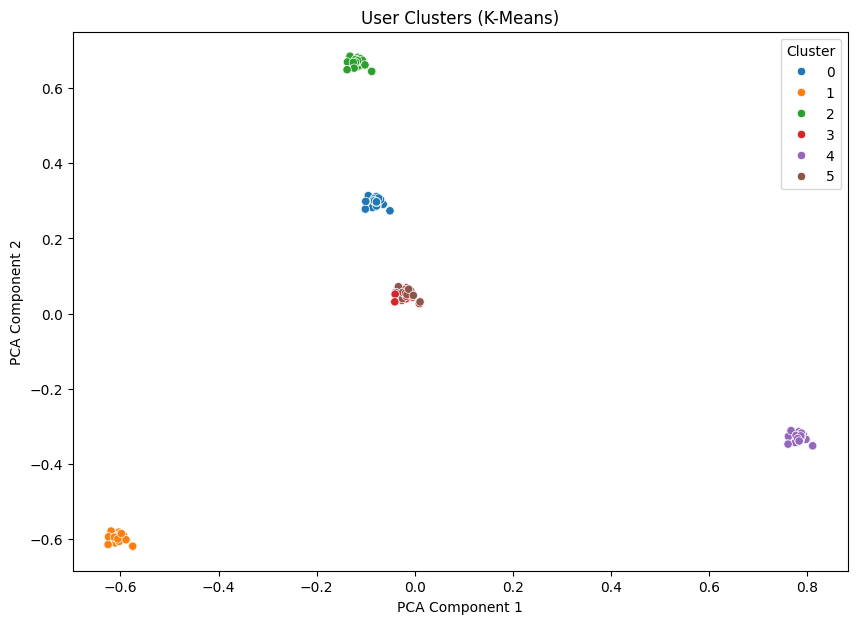

In [13]:
from sklearn.decomposition import PCA

# Reduce to 2D using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(encoded_features.toarray())

# Add PCA components to DataFrame
df_sample["PCA1"] = reduced_features[:, 0]
df_sample["PCA2"] = reduced_features[:, 1]

# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_sample["PCA1"], y=df_sample["PCA2"], hue=df_sample["Cluster"], palette="tab10")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("User Clusters (K-Means)")
plt.legend(title="Cluster")
plt.show()


In [14]:
chosen_cluster = 4

# Filter users belonging to the chosen cluster
cluster_users = df_sample[df_sample["Cluster"] == chosen_cluster]

# Display a random sample of 5 users from this cluster
print(cluster_users[["UserID", "Country", "AgeGroup"]].sample(n=10, random_state=42))

      UserID        Country AgeGroup
820    29506    Philippines    45-54
149     8019          China    45-54
325    69229          Italy    45-54
1744   18735          Japan    45-54
1798   19758  United States    45-54
359    18293        Nigeria    45-54
1958   54710          China    45-54
1976   23918      Venezuela    45-54
598    96223          Japan    45-54
1969   57344       Slovakia    45-54
